# DataScience Projekt  


Dieses Notebook stellt einen ersten Versuch der Analyse des "Titanic" Datensatzes durch die Studenten Michael Wilhelm und Sandro Zeiher nach der Vorgehensweise des Crisp User Manuals dar. Benutzt wurden Kapitel 2,3 und 4 des User Manuals (S. 37 - S.51), die in diesem Notebook in deutscher Übersetzung enhalten sind. 




# **2. Datenverständnis**


 ## **2.1 Anfangsdaten sammeln**

**Aufgabe**: *Anfangsdaten sammeln*

Beschaffen Sie die Daten (oder Zugang zu den Daten), die in den Projektressourcen aufgelistet sind. Diese erste Sammlung schließt das Einlesen der Daten ein, falls es für das Verständnis der Daten nötig ist. Wenn Sie beispielsweise vorhaben, ein bestimmtes Werkzeug zum Datenverständnis zu verwenden, ist es sinnvoll, Ihre Daten in dieses Werkzeug zu laden.


**Ergebnis**: ***Bericht über Erstdatenerhebung***


Beschreiben Sie alle in dem Projekt verwendeten unterschiedlichen Daten und fügen Sie alle Auswahkriterien für eine detaillierte Darstellung ein. Der Bericht über Erstdatenerhebung sollte ebenfalls die Wichtigkeit der Attribute definieren.

Denken Sie daran, dass jegliche Bewertung der Datenqualität nicht nur anhand der einzelnen Quellen der Daten erfolgen sollte, sondern ebenfalls für alle Daten aus sich überschneidenden Datenquellen . Aufgrund von Inkonsistenz zwischen den Quellen können zusammengesetzte Daten probleme verursachen, die nicht in den einzelnen Datenquellen existieren


**Aktivitäten**: 


<br />


*Datenbedarfsplanung*



Planen Sie, welche Informationen benötigt werden (z.B. nur für bestimmte Attribute oder spezifische Zusatzinformationen).

Überprüfen Sie, ob alle erforderlichen Informationen (zur Lösung der Data-Mining-Ziele) tatsächlich verfügbar sind.

<br />
<br />

**Auswahlkriterien**

* Geben Sie Auswahlkriterien an <br />
 - Welche Attribute sind für die angegebenen Data-Mining-Ziele erforderlich?. <br />
 - Welche Attribute wurden als irrelevant identifiziert?   <br />
 - Wie viele Attribute können wir mit den ausgewählte Techniken auswerten?).<br />


* Wählen Sie Tabellen/Dateien von Interesse aus.


* Daten innerhalb einer Tabelle/Datei auswählen


* Denken Sie darüber nach, wie lange man eine Chronik verwenden sollte (z.B. auch wenn 18 Monate an Daten zur Verfügung stehen, können nur 12 Monate für die Übung notwendig sein)

**Beachte!**

Beachten Sie, dass Daten, die aus unterschiedlichen Quellen gesammelt werden, beim Kombinieren zu Qualitätsproblemen führen können.
(z.B. können Adressdateien, die mit einer Kundendatenbank zusammengeführt werden, Inkonsistenz in Bezug auf Format und  Ungültigkeit der Daten aufweisen)

*Einfügen von Daten*

+ Wenn die Daten Freitext-Einträge enthalten, müssen wir sie für die Modellierung kodieren oder sollen diese gruppiert werden?

+ Wie können fehlende Attribute erfasst werden?

+ Wie können wir die Daten am besten extrahieren?

In [1]:
#2.1
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn import metrics
from sklearn.model_selection import KFold, cross_val_score, train_test_split
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import confusion_matrix


#DataFrame initialisieren
url = "titanic_kaggle_train.csv"
url2 = "titanic_kaggle_test.csv"

train_df = pd.read_csv(url)
test_df = pd.read_csv(url2)

comb_df =  [train_df,test_df]

print(train_df.shape)
test_df.shape

(891, 12)


(418, 11)

In [2]:
#Anzahl NaN-Werte

train_df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

## **2.2 Beschreiben der Daten**

**Aufgabe** *Daten beschreiben*

Überprüfen Sie die "Brutto"-Eigenschaften der erfassten Daten und berichten Sie über die Ergebnisse.

**Ergebnis**: ***Bericht über Datenbeschreibung***

Beschreiben Sie die die erhobenen Daten, einschließlich Datenformat, Quantität (z.B. die Anzahl der Einträge und Felder in den Tabellen), die Identitäten der Felder und jegliche andere oberflächliche Eigenschaften, die entdeckt wurden.

**Aktivitäten** 





*Volumetrische Analyse der Daten*

 + Identifizieren Sie Daten und Erfassungsmethode.

 
 + Zugriff auf Datenquellen

 
 + Verwenden Sie gegebenenfalls statistische Analysen.

 
 + Berichtstabellen und ihre Relationen


 + Überprüfen Sie das Datenvolumen, die Anzahl der Multiplikatoren, die Komplexität.

 
 + Merken Sie an, ob die Daten Freitext-Einträge enthalten.


*Attributtypen und -werte*

 
 + Überprüfen Sie die Zugänglichkeit und Verfügbarkeit von Attributen.

 
 + Überprüfen Sie die Attributtypen (numerisch, symbolisch, Taxonomie, etc.).

 
 + Attributwertbereiche prüfen

 
 + Attributkorrelationen analysieren

 
 + Verstehen Sie die Bedeutung der Attribute und Attributwerte in Bezug auf ihre wirtschaftliche Bedeutung.

 
 + Berechnen Sie für jedes Attribut grundlegende Statistiken (z.B. Berechnen Sie +erteilung, Durchschnitt, Maximum, Minimum, Minimum, Standardabweichung, Varianz, Modus, Schiefe, etc.)
 
 
 + Analysieren Sie grundlegende Statistiken und beziehen Sie die Ergebnisse auf ihre wirtschaftliche Bedeutung.

 
 + Entscheiden Sie, ob das Attribut für das spezifische Data-Mining-Ziel relevant ist.

 
 + Bestimmen Sie, ob die Attributbedeutung konsistent verwendet wird.

 
 + Befragen Sie Domain-Experten, um ihre Meinung zur Attributrelevanz zu erhalten

 
 + Entscheiden Sie, ob es notwendig ist, die Daten zu gewichten (basierend auf den zu verwendenden Modellierungstechniken).


*Schlüssel*

 
 + Analysieren Sie die Beziehungen der Schlüssel

 
 + Überprüfen Sie die Anzahl der Überschneidungen von Schlüsselattributwerten in den Tabellen.


*Überprüfungsannahmen/Ziele*

 
 + Aktualisieren Sie die Liste der Annahmen, falls erforderlich. 

In [3]:
#2.2
#Beschreiben der Daten
train_df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [4]:
test_df.describe()

,PassengerId,Pclass,Age,SibSp,Parch,Fare
count,418.000000,418.000000,332.000000,418.000000,418.000000,417.000000
mean,1100.500000,2.265550,30.272590,0.447368,0.392344,35.627188
std,120.810458,0.841838,14.181209,0.896760,0.981429,55.907576
min,892.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,996.250000,1.000000,21.000000,0.000000,0.000000,7.895800
50%,1100.500000,3.000000,27.000000,0.000000,0.000000,14.454200
75%,1204.750000,3.000000,39.000000,1.000000,0.000000,31.500000
max,1309.000000,3.000000,76.000000,8.000000,9.000000,512.329200


In [5]:
#Geschlecht, Alter, Pclass könnten relevant sein
#Ueberlebenswahrscheinlichkeit der Geschlechter

sex_pivot = train_df.pivot_table(index = "Sex", values = "Survived")
sex_pivot

,Survived
Sex,
female,0.742038
male,0.188908


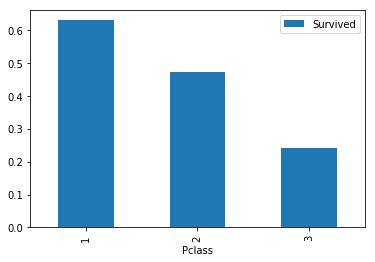

In [6]:
#Ueberlebenswahrscheinlichkeit der Passagierklassen

pclass_pivot = train_df.pivot_table(index = "Pclass", values = "Survived")
pclass_pivot.plot.bar()
plt.show()

In [7]:
#fehlendes Alter auffüllen und in Gruppen teilen

def alter(df,cut_points,label_names):
    df["Age"] = df["Age"].fillna(-0.5)
    df["Age_categories"] = pd.cut(df["Age"],cut_points,labels=label_names)
    return df

cut_points = [-1,0,5,12,20,60,100]
label_names = ["Unbekannt","Kleinkind","Kind","Teenager","Erwachsener","Senior" ]

train_df = alter(train_df,cut_points,label_names)
test_df = alter(test_df,cut_points,label_names)

[177, 44, 25, 110, 513, 22]


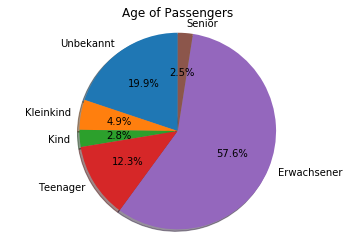

In [8]:
#Anzahl Personen in den Altersgruppen
def get_survival_dead_count(df):
    survivants_count = len(df[df.Survived == 1])
    deads_count = len(df) - survivants_count
    return survivants_count, deads_count 

survivants_deads_per_age = []
survivants_deads_per_age.append( get_survival_dead_count(train_df[train_df.Age_categories == 'Unbekannt']) )
survivants_deads_per_age.append( get_survival_dead_count(train_df[train_df.Age_categories == 'Kleinkind']) )
survivants_deads_per_age.append( get_survival_dead_count(train_df[train_df.Age_categories == 'Kind']) )
survivants_deads_per_age.append( get_survival_dead_count(train_df[train_df.Age_categories == 'Teenager']) )
survivants_deads_per_age.append( get_survival_dead_count(train_df[train_df.Age_categories == 'Erwachsener']) )
survivants_deads_per_age.append( get_survival_dead_count(train_df[train_df.Age_categories == 'Senior']) )

labels = ['Unbekannt', 'Kleinkind',  'Kind', 'Teenager', 'Erwachsener', 'Senior']
sizes = [ sum(e) for e in survivants_deads_per_age ]
print(sizes)

fig, ax = plt.subplots()
ax.pie(sizes, labels=labels, shadow=True, startangle=90, autopct='%1.1f%%')
ax.axis('equal')
plt.title('Age of Passengers')
plt.show()

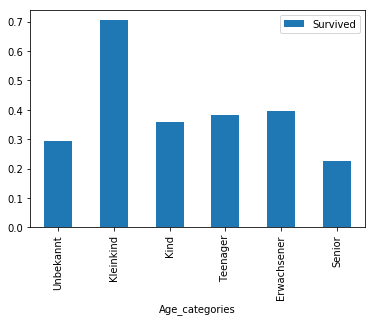

In [9]:
#Ueberlebenswahrscheinlichkeiten der ALtersgruppen

age_cat_pivot = train_df.pivot_table(index="Age_categories",values="Survived")
age_cat_pivot.plot.bar()
plt.show()

## **2.3 Daten erforschen**

**Aufgabe** *Daten erforschen*

Diese Aufgabe befasst sich mit Datamining-Fragen, die mit Hilfe von Abfragen, Visualisierung und
Berichtstechniken gelöst werden. Diese Analysen können sich direkt auf die Datamining-Ziele beziehen. Sie können jedoch
auch zur Datenbeschreibung und zu Qualitätsberichten beitragen oder diese verfeinern,sowie zur Transformation und andere Datenaufbereitungsschritten beitragen, die erforderlich sind, bevor eine weitere Analyse erfolgen kann.


**Ergebnis**: ***Datenerforschungsbericht***

Beschreiben Sie die Ergebnisse dieser Aufgabe, einschließlich erster Erkenntnisse oder anfänglicher Hypothesen und deren Auswirkungen auf den Rest des Projekts. Der Bericht kann auch Grafiken und Diagramme enthalten, die Datenmerkmale anzeigen oder auf interessante Datenteilmengen verweisen, die einer weiteren Untersuchung würdig sind.

**Aktivitäten**





*Datenforschung*
 
 
 + Analysieren Sie die Eigenschaften interessanter Attribute im Detail (z.B. grundlegende Statistiken, interessante Subpopulationen).

 
 + Identifizierung von Merkmalen der Subpopulationen



<br />

*Formulieren Sie Vermutungen für die zukünftige Analyse*



<br />


 + Berücksichtigen und bewerten Sie Informationen und Ergebnisse im Bericht über die Datenbeschreibung.

 
 + Bilden Sie eine Hypothese und identifizieren Sie Aktionen.

 
 + Transformieren Sie falls möglich die Hypothese in ein Data-Mining-Ziel.

 
 + Klären Sie Data-Mining-Ziele oder präziseren Sie sie. Eine "blinde" Suche ist nicht unbedingt nutzlos,aber eine gezieltere Suche nach Geschäftszielen ist vorzuziehen.

 
 + Durchführung einer Basisanalyse zur Überprüfung der Hypothese

In [10]:
#2.3
#Uebersetzen der Spalten

train_df_tr = train_df.rename(columns={'PassengerId': 'PassagierID', 
                                                                         'Survived': 'Überlebt',
                                                                         'Pclass': 'Passagierklasse',
                                                                         'Name': 'Name',
                                                                         'Sex': 'Geschlecht',
                                                                         'Age': 'Alter',
                                                                         'SibSp': 'Geschwister&Partner',
                                                                         'Parch': 'Eltern&Kinder',
                                                                         'Fare': 'Ticketpreis',
                                                                         'Cabin': 'Kabine',
                                                                         'Embarked': 'Zugestiegen',
                                                                         'Age_categories':'Altersklasse'})
test_df_tr = test_df.rename(columns={'PassengerId': 'PassagierID', 
                                                                         'Survived': 'Überlebt',
                                                                         'Pclass': 'Passagierklasse',
                                                                         'Name': 'Name',
                                                                         'Sex': 'Geschlecht',
                                                                         'Age': 'Alter',
                                                                         'SibSp': 'Geschwister&Partner',
                                                                         'Parch': 'Eltern&Kinder',
                                                                         'Fare': 'Ticketpreis',
                                                                         'Cabin': 'Kabine',
                                                                         'Embarked': 'Zugestiegen',
                                                                         'Age_categories':'Altersklasse'})
train_df_tr

,PassagierID,Überlebt,Passagierklasse,Name,Geschlecht,Alter,Geschwister&Partner,Eltern&Kinder,Ticket,Ticketpreis,Kabine,Zugestiegen,Altersklasse
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,Erwachsener
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,Erwachsener
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Erwachsener
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,Erwachsener
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,Erwachsener
5,6,0,3,"Moran, Mr. James",male,-0.5,0,0,330877,8.4583,NaN,Q,Unbekannt
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S,Erwachsener
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S,Kleinkind
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S,Erwachsener
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C,Teenager


## **2.4 Verifizieren der Datenqualität**

**Aufgabe** Verifizieren der Datenqualität




Untersuchen Sie die Qualität der Daten, wie etwa im Hinblick auf die Fragen: 
 + Sind die Daten vollständig (decken sie alle Bereiche ab)?
 + Fälle erforderlich)?
 + Sind die Daten korrekt oder enthalten sie Fehler? 
 + Wenn es Fehler gibt, wie häufig sind sie? 
 + Gibt es fehlende Werte in den Daten?
 + Wenn ja, wie werden sie dargestellt, wo treten sie auf und wie häufig treten sie auf?


**Ergebnis**: ***Datenqualitätsbericht***

Listen Sie die Ergebnisse der Datenqualitätsprüfung auf ; falls Qualitätsprobleme vorhanden sind, listen Sie mögliche Lösungen auf.

**Aktivitäten**


* Identifizieren Sie spezielle Werte und katalogisieren Sie deren Bedeutung.



<br />


*Überprüfung der Schlüssel, Attribute*



+ Überprüfung der Abdeckung (z.B. ob alle möglichen Werte dargestellt werden)



+ Schlüssel überprüfen


+ Stellen Sie sicher, dass die Bedeutung von Attributen und enthaltenen Werten zusammenpassen.


+ Identifizieren Sie fehlende Attribute und leere Felder


+ Stellen Sie die Bedeutung von fehlenden Daten fest


+ Prüfen Sie auf Attribute mit unterschiedlichen Werten, die eine ähnliche Bedeutung haben (z.B. fettarm, Diät-)


+ Überprüfen Sie die Rechtschreibung und das Format der Werte (z.B. gleicher Wert, aber manchmal beginnend mit einem Kleinbuchstaben und manchmal mit einem Großbuchstaben)



+ Überprüfen Sie auf Abweichungen und entscheiden Sie, ob eine Abweichung "Rauschen" ist oder auf ein interessantes Phänomen hinweisen könnte


+ Plausibilität von Werten überprüfen( z.B. alle Felder mit gleichen oder nahezu gleichen Werten)

<br />

*Datenqualität in flachen Dateien*


+ Falls Daten in flachen Dateien gespeichert werden, überprüfen Sie, welches Trennzeichen verwendet wurde und ob es konsistent in allen Attributen benutzt wird

+ Falls Daten in flachen Dateien gespeichert werden, überprüfen Sie die Anzahl der Felder in jedem Datensatz, um festzustellen, ob sie übereinstimmen.

<br />


*Rauschen und Inkonsistenzen zwischen den Quellen*

+ Überprüfen Sie Konsistenzen und Redundanzen zwischen verschiedenen Quellen.

+ Plan für den Umgang mit Noise

+ Erkennen Sie die Art des Rauschens und welche Attribute betroffen sind.

# 3. Datenaufbereitung 

**Ergebnis**: ***Datensatz***


Der Datasatz bzw. die Datensätze, die in der Datenaufbereitungsphase erstellt wurden und für Medellierungen oder  den Großteil der Analysearbeit des projektes benutzt wird.

**Ergebnis**: ***Datensatzbeschreibung***

Die Beschreibung das Datensatzers (bzw. der Datensätze), der für Medellierungen oder  den Großteil der Analysearbeit des projektes benutzt wird.

## 3.1 Datenauswahl

**Aufgabe** *Datenauswahl*

Entscheiden Sie, welche Daten, in der Analyse verwendet werden sollen. Die Kriterien schließen Relevanz für die Datamining-Ziele, Qualität und technische Beschränkungen wie etwa Speicherplatzkapazitäten oder Datentypen mit ein.

**Ergebnis**: ***Begründung für Einbeziehung bzw. Ausschluss***

Listen Sie die zu verwendenden/auszuschließenden Daten und die Gründe für diese Entscheidungen auf.

**Aktivitäten**


+ Sammeln geeigneter zusätzlicher Daten (aus verschiedenen Quellen - sowohl firmenintern als auch -extern)


+ Führen Sie Signifikanz- und Korrelationstests durch, um zu entscheiden, ob Felder aufgenommen werden sollen.


+ Überdenken Sie die Datenauswahlkriterien (siehe Aufgabe 2.1) im Hinblick auf die Erfahrungen mit der Datenqualität und der Erforschung der Daten ( Einbezug/Auschluss von anderen Datensätzen).



+ Überdenken Sie die Datenauswahlkriterien (siehe Aufgabe 2.1) im Hinblick auf die Erfahrungen mit der Modellierung (d.h. Modellierungbeurteilung kann zeigen, dass andere Datensätze erforderlich sind).


+ Verschiedene Datenteilsätze auswählen (z.B. verschiedene Attribute, nur Daten, die bestimmte Bedingungen erfüllen)


+ Erwägen Sie den Einsatz von Stichprobentechniken (z.B. eine schnelle Lösung kann die Aufteilung von Test- und Übungsdatensätzen oder das Reduzieren der Größe des Testdatensatzes beinhalten, falls das Werkzeug mit dem ganzen Datensatz überfordert ist.  Es kann auch nützlich sein, gewichtete Stichproben zu haben, um verschiedenen Attributen oder verschiedenen Werten des gleichen Attributes unterschiedliche Bedeutung zu verleihen).



+ Dokumentieren Sie die Gründe für die Ein-/Ausschließung.


+ Überprüfen Sie die verfügbaren Techniken für die Datenasuwahl.

## 3.2 **Datenbereinigung**

**Aufgabe** *Daten reinigen*

Erhöhen Sie die Datenqualität auf das von den ausgewählten Analysetechniken geforderte Niveau. Dies kann unter Umständen die Auswahl von sauberen Teilsätzen der Daten, das Einfügen geeigneter Standardwerte oder durch anspruchsvollere Techniken wie z.B. die Schätzung fehlender Daten mit Hilfe Modellierung einschließen.

**Ergebnis**: ***Datenbereinigungsbericht***


Beschreiben Sie die Entscheidungen und Maßnahmen, die getroffen wurden, um die Probleme bezüglich der Datenqualität zu beseitigen, die während der Zeit der Qualitätsüberprüfung gemeldet wurden. Falls die Daten in der Datamining-Übung verwendet werden sollen, sollte der Bericht auffällige Datenqualitätsprobleme und deren mögliche Effekte diese auf die Resultate thematisieren.


**Aktivitäten**

+ Überdenken Sie, wie Sie mit jeder beobachteten Art von Rauschen umgehen.


+ Rauschen korrigieren, entfernen oder ignorieren.


+ Entscheiden Sie, wie Sie mit besonderen Werten und deren Bedeutung umgehen. Der Bereich der Sonderwerte kann kann viele außergewöhnliche Ergebnisse hervorbringen und sollte vorsichtig überprüft werden. Beispiele für spezielle Werte können  durch die Ergebnisse einer Umfrage entstehen, bei der einige Fragen nicht gestellt oder nicht beantwortet wurden. Dies kann zu einem Wert von 99 für unbekannte Daten führen. Zum Beispiel 99 für Familienstand oder politische Zugehörigkeit. Besondere Werte kann auch entstehen, wenn Daten abgekürzt werden - z.B. 00 für 100-Jährige oder alle Autos mit 100.000 km. auf dem Kilometerzähler.


+ Überdenken Sie die Datenauswahlkriterien (siehe Aufgabe 2.1) im Hinblick auf die Erfahrungen mit der Datenreinigung (d.h. Sie könnten andere Datensätze einbeziehen/ausschließen wollen).

In [11]:
#3.1 und 3.2
#Löschen der unwichtigen Spalten

train_df2=train_df_tr.drop(['Ticket','Kabine','Zugestiegen','Ticketpreis','Name'],axis = 1)
test_df2=test_df_tr.drop(['Ticket','Kabine','Zugestiegen','Ticketpreis','Name'],axis = 1)
comb_df = [train_df2,test_df2]

In [12]:
#Mappen der kategorialen Werte

for Datensatz in comb_df:
    Datensatz['Geschlecht'] = Datensatz['Geschlecht'].map( {'female': 1, 'male': 0} ).astype(int)

for Datensatz in comb_df:
    Datensatz['Altersklasse'] = Datensatz['Altersklasse'].map( {'Unbekannt': 0, 'Kleinkind': 1, 'Kind':2, 'Teenager':3, 'Erwachsener':4, 'Senior':5 } ).astype(int)

train_df2.head()

,PassagierID,Überlebt,Passagierklasse,Geschlecht,Alter,Geschwister&Partner,Eltern&Kinder,Altersklasse
0,1,0,3,0,22.0,1,0,4
1,2,1,1,1,38.0,1,0,4
2,3,1,3,1,26.0,0,0,4
3,4,1,1,1,35.0,1,0,4
4,5,0,3,0,35.0,0,0,4


## 3.3 **Erstellen neuer Daten**



**Aufgabe** *neue Daten erstellen*

Diese Aufgabe umfasst konstruktive Datenaufbereitungsoperationen wie das Erstellen von abgeleiteten Attributen,
neue Datensätze zu vervollständigen oder dem Transformieren von Werten für bestehende Attribute.

**Aktivitäten**



+ Überprüfen Sie die verfügbaren Konstruktionsmechanismen mit der Liste der für das Projekt vorgeschlagenen Werkzeuge.

+ Entscheiden Sie, ob die Konstruktion am besten innerhalb des Werkzeuges oder außerhalb durchgeführt werden soll. (d.h welche Methode ist effizienter, genauer, einfacher zuwiederholen)

+ Überdenken Sie die Datenauswahlkriterien (siehe Aufgabe 2.1) im Hinblick auf die Erfahrungen mit der Datenkonstruktion (d.h. Sie sind kann andere Datensätze einschließen/ausschließen wollen)


**Ergebnis**: ***abgeleitete Attribute***

Abgeleitete Attribute sind neue Attribute, die aus einem oder mehreren bereits existierenden Atrributen aus dem gleichen Datensatz hergestellt werden. <br />
Zum Beispiel: Fläche = länge * Breite.

Warum sollten wir abgeleitete Attribute im Verlauf einer Datamining-Untersuchung herstellen müssen? Es sollte nicht angenommen werden, dass nur Daten aus Datenbanken oder anderen Quellen zum Herstellen eines Modells benutzt werden sollten. Abgeleitete Atrribute könnten erstellt werden weil...:


+ ... Hintergrundwissen uns überzeugt, dass einige Fakten wichtig sind und repräsentiert werden sollten, obwohl kein Attribut zur Zeit hierzu zur Verfügung steht



+ ... der benutzte Modellierungsalgorithmus nur gewisse Datentypen verarbeitet - z.B. Wir benutzen die lineare Regression und wir vermuten, dass einige Nichtlinearitäten vorhanden sind, die nicht in das Modell eingefügt werden


+ ... das Ergebnis der Modellierungsphase andeutet, dass einige Fakten nicht abgedeckt werden

**Aktivitäten** *Transformationen von abgeleiteten Attributen*



+ Entscheiden Sie, ob ein Attribut normalisiert werden soll (z.B. bei Verwendung eines Clustering-Algorithmus mit Alter und Einkommen, in bestimmten Anwendungsfällen wird das Einkommen dominieren)


+ Erwägen Sie, neue Informationen über die relevante Bedeutung von Attributen hinzuzufügen, indem Sie neue Attribute hinzufügen.(z.B. Attributgewichte, gewichtete Normalisierung )


+ Wie können fehlende Attribute hergestellt oder zugerechnet werden? [Entscheiden Sie die Art der Konstruktion (z.B. Summe, Durchschnitt, Induktion).]


+ Neue Attribute zu den aufgerufenen Daten hinzufügen




**Aktivitäten** *Transformieren von Einzelattributen*

+ Spezifizieren Sie die notwendigen Transformationsschritte in Bezug auf die zur Verfügung stehenden Transformationsmöglichkeiten (z.B, Binning eines numerischen Attributs ändern)

+ Ausführung der Transformationsschritte 

**Ergebnis**: ***Hergestellte Aufzeichnungen***

Hergestellte Aufzeichnungen sind völlig neue Aufzeichnungen, die neues Wissen hinzufügen oder neue Daten repräsentieren, die nicht auf andere Weise repräsentiert werden (z.B nachdem Daten unterteilt wurden, kann es nützlich sein, eine neue Aufzeichnung zu erstellen, um das Prototypenmitglied eines jedes Segments für die weitere Verarbeitung zu repräsentieren) 




In [13]:
#3.3
#Ergaenzen von FamilySize
train_df2['Familiengroeße'] = train_df2['Geschwister&Partner'] + train_df2['Eltern&Kinder'] + 1
train_df2 =train_df2.drop(['Geschwister&Partner','Eltern&Kinder'],axis =1)
train_df2.head()

,PassagierID,Überlebt,Passagierklasse,Geschlecht,Alter,Altersklasse,Familiengroeße
0,1,0,3,0,22.0,4,2
1,2,1,1,1,38.0,4,2
2,3,1,3,1,26.0,4,1
3,4,1,1,1,35.0,4,2
4,5,0,3,0,35.0,4,1


In [14]:
#Festsetzen der Trainingsdatensaetze

X_train = train_df2.drop("Überlebt", axis=1)
Y_train = train_df2["Überlebt"]
X_test  = train_df2.drop("PassagierID", axis=1).copy()
X_train.shape, Y_train.shape, X_test.shape


((891, 6), (891,), (891, 6))

## 3.4 **Integration  von Daten**

**Aufgabe**: *Daten integrieren*

Dies sind Methoden zum Kombinieren von Informationen aus mehreren Tabellen oder anderen Informationsquellen.
um neue Datensätze oder Werte herzustellen.

**Ergebnis**:*Zusammengesetzte Daten*

Das Zusammensetzen von Tabellen bezieht sich auf das Verbinden von zwei oder mehr Tabellen, die unterschiedliche Informationen über dieselben Objekte besitzen. <br /> 
In dieser Phase kann es auch empfehlenswert sein, neue Datensätze zu generieren. Es kann auch ratsam sein, summierte Werte zu erzeugen. 
<br />


Die Aggregation bezieht sich auf Vorgänge, bei denen neue Werte berechnet werden, indem Informationen aus  mehrere Datensätze und/oder Tabellen zusammengefasst werden.


**Aktivitäten**

+ Überprüfen Sie, ob die Integrationshilfsmittel in der Lage sind, die Inputquellen nach Bedarf zu integrieren.

+ Quellen integrieren und Ergebnisse speichern

+ Überdenken Sie die Datenauswahlkriterien (siehe Aufgabe 2.1) im Hinblick auf die Erfahrungen mit der Datenintegration (d.h. Sie könnten andere Datensätze einbeziehen/ausschließen wollen)

## 3.5 Formatieren von Daten

**Aufgabe** *Daten formatieren*

Die Formatierung von Transformationen bezieht sich in erster Linie auf syntaktische Änderungen an den Daten, die  ihre Bedeutung nicht ändern, aber dennoch vom Modellierungswerkzeug gefordert werden.

**Ergebnis**: ***Formatierte Daten***
    
Einige Werkzeuge haben Anforderungen an die Reihenfolge der Attribute, wie etwa die Notwendigkeit, dass das erste Feld ein eindeutiges Kennzeichen für jede Aufzeichnung ist, oder dass das letzte Feld das Ergebnisfeld ist, welches das Modell vorhersagen soll.

**Aktivitäten** *Neuanordnung von Attributen*

Einige Werkzeuge haben Anforderungen an die Reihenfolge der Attribute, wie etwa die Notwendigkeit, dass das erste Feld ein eindeutiges Kennzeichen für jede Aufzeichnung ist, oder dass das letzte Feld das Ergebnisfeld ist, welches das Modell vorhersagen soll.

<br />


*Datensätze neu sortieren*


Es kann wichtig sein, die Reihenfolge der Datensätze im Dataset zu ändern. Möglicherweise erfordert das Modellierungswerkzeug, dass die Datensätze nach dem Wert des Ergebnisattributs sortiert werden.

<br />

*Neusortierung innerhalb des Wertes*

+ Dies sind rein syntaktische Änderungen, die vorgenommen werden, um den Anforderungen des jeweiligen Modellierungstools gerecht zu werden.

+ Überdenken Sie die Datenauswahlkriterien (siehe Aufgabe 2.1) im Hinblick auf die Erfahrungen mit der Datenreinigung (d.h. wenn Sie andere Datensätze einbeziehen/ausschließen wollen)

# 4. Modellieren

## 4.1  Modellierungstechniken auswählen

**Aufgabe** *Modellierungstechniken auswählen*

Wählen Sie als ersten Schritt der Modellierung die eigentliche anfängliche Modellierungstechnik. Wenn mehrere Techniken angewendet werden sollen, führen Sie diese Aufgabe für jede Technik separat durch.

Denken Sie daran, dass nicht alle Werkzeuge und Techniken auf jede einzelne Aufgabe anwendbar sind. Für bestimmte Probleme sind nur einige Techniken angemessen (siehe Anhang 2). "Politische Anforderungen" und andere Einschränkungen grenzen  die dem Datamining-Techniker zur Verfügung stehenden Auswahlmöglichkeiten weiter ein. Es kann sein, dass nur ein Werkzeug oder eine Technik dem Datamining-Techniker zur Verfügung steht, um das vorliegende Problem zu lösen und dass das Werkzeug aus technischer Sicht möglicherweise nicht das allerbeste ist.

**Ergebnis** *Modellierungstechniken* 

Aufzeichnung der benutzten Modellierungstechnik 

**Aktivitäten** 

Entscheiden Sie sich für eine geeignete Technik zum Ausführen und berücksichtigen Sie dabei das gewählte Werkzeug.

**Ergebnis** *Modellierungsannahmen*

*Aktivitäten*

+ Definieren Sie alle eingebauten Annahmen, die die Technik über die Daten trifft (z.B. Qualität, Format, Verteilung).

+ Vergleichen Sie diese Annahmen mit denen im Datenbeschreibungsbericht.

+ Stellen Sie sicher, dass diese Annahmen eingehalten werden und gehen Sie - falls nötig- zurück in die Phase der Datenvorbereitung.



In [17]:
#Linear Regression

lr = LinearRegression().fit(X_train,Y_train)
pred = lr.predict(X_test)
acc_lr = round(lr.score(X_train, Y_train), 2)
acc_lr

0.38

In [18]:
#Logistic Regression

logr = LogisticRegression()
logr.fit(X_train,Y_train)
pred = logr.predict(X_test)
acc_logr = round(logr.score(X_train, Y_train), 2)
acc_logr

0.79

In [19]:
all_X = X_train
all_y = Y_train

train_X, test_X, train_y, test_y = train_test_split(
    all_X, all_y, test_size=0.2,random_state=0)

In [20]:
standardizer = StandardScaler()
logrm = LogisticRegression()
pipe = make_pipeline(standardizer, logrm)
kf = KFold(n_splits = 10, shuffle = True, random_state = 1)
cv_results = cross_val_score(pipe, all_X, all_y, cv = kf, scoring="accuracy", n_jobs = -1)
logrcv = cv_results.mean()
logrcv

0.7845443196004993

In [21]:
standardizer = StandardScaler()
lrm = LinearRegression()
pipe = make_pipeline(standardizer, lrm)
kf = KFold(n_splits = 10, shuffle = True, random_state = 1)
cv_results = cross_val_score(pipe, all_X, all_y, cv = kf, n_jobs = -1)
lrcv = cv_results.mean()
lrcv

0.36850865414732625

## 4.2 **Erstellen eines Testdesigns**

**Aufgabe** *Testdesign generieren*

Vor der Erstellung eines Modells ist es notwendig, ein Verfahren zum Testen der Qualität und der Gültigkeit des Modells zu definieren. Zum Beispiel ist es bei überwachten Dataminig-Aufgaben wie etwas der Klassifikation üblich, Fehlerraten als Qualitätsmesseinheit für Datamining-Modelle zu verwenden. Daher legt das Testdesign fest, dass der Datensatz in Trainings- und Testsets geteilt werden soll. Das Modell wird mit Hilfe des Trainingssets erstellt und seine Qualität  am Testset geschätzt.

**Ergebnis**: *Testdesign*

Beschreiben Sie den vorgesehenen Plan für das Training, Testen und Bewerten der Modelle. Ein Hauptbestandteil des Plans ist es, zu entscheiden, wie der verfügbare Datensatz in Trainingsdaten, Testdaten und Validierungstestsätze unterteilt werden soll.

**Aktivitäten**

+ Vorhandene Testkonzepte für jedes Datamining-Ziel separat überprüfen.

+ Entscheiden Sie sich für die notwendigen Schritte (Anzahl der Iterationen, Anzahl der Folds, etc.).

+ Bereiten Sie die für die Prüfung erforderlichen Daten vor

## 4.3 Erstellen eines Modells 

**Aufgabe** *Modell erstellen*

Führen Sie das Modellierungswerkzeug auf dem vorbereiteten Datensatz aus, um ein oder mehrere Modelle zu erstellen.

**Ergebnisse** *Parametereinstellungen*

Bei jedem Modellierungswerkzeug gibt es oft eine große Anzahl von Parametern, die angepasst werden können. Listen Sie die Parameter und ihre gewählten Werte sowie die Begründung für die Wahl auf.

**Aktivitäten** 

+ Anfängliche Parameter setzen

+ Gründe für das Wählen dieser Werte dokumentieren



**Ergebnisse** *Modelle*

Führen Sie das Modellierungswerkzeug auf dem vorbereiteten Datensatz aus, um ein oder mehrere Modelle zu erstellen.



**Aktivitäten**

+ Ausführen der ausgewählten Technik auf dem Eingabedatensatz, um das Modell zu erstellen.

+ Datamining-Ergebnisse nachbearbeiten (z.B. Regeln bearbeiten, Bäume anzeigen)



**Ergebnisse** *Modellbeschreibung*

Beschreiben Sie das resultierende Modell und beurteilen Sie seine erwartete Genauigkeit, Robustheit und mögliche Mängel. Berichten Sie  über die Interpretation der Modelle und die aufgetretenen Schwierigkeiten.


**Aktivitäten**

+ Beschreiben Sie alle Merkmale des aktuellen Modells, die für die Zukunft nützlich sein könnten.

+ Erfassen Sie die Parametereinstellungen, die zur Erstellung des Modells verwendet wurden.

+ Geben Sie eine detaillierte Beschreibung des Modells und aller besonderen Features an.

+ Listen Sie für regelbasierte Modelle  die erstellten Regeln, sowie jede Bewertung von regelbasierter oder allgemeiner  Genauigkeit und Spannbreite des Gesamtmodelsl auf.



+ Für opaken Modelle listen Sie alle technischen Informationen (z.B. neuronale Netzwerktopologie)und alle Verhaltensbeschreibungenüber das Modell auf , die durch den Modellierungsprozess erzeugt werden (wie etwa Genauigkeit oder Empfindlichkeit).

+ Beschreiben Sie das Verhalten und die Interpretation des Modells.

+ Formulieren Sie Folgerungen zu Mustern in den Daten (falls vorhanden); manchmal enthüllt das Modell wichtige Fakten über die Daten ohne separates Bewertungsverfahren (z.B. dass die Ergebnisse oder Schlussfolgerungen in einer Aingabe dupliziert werden).

## 4.4 Bewerten des Modells

**Aufgabe** *Bewerten des Modells*

Das Modell sollte nun bewertet werde, um sicherzustellen, dass es die Dataminingerfolgskriterien erfüllt und den erwünschten Testkriterien entspricht.  Dies ist eine rein technische Bewertung, die auf dem Ergebnis der Modellierungsaufgaben basiert.

**Ergebnis** *Modellbewertung*

Fassen Sie die Ergebnisse dieser Aufgabe zusammen, listen Sie die Qualitäten der generierten Modelle auf (z.B. in Bezug auf die Genauigkeit) und ordnen Sie deren Qualität im Verhältnis zueinander ein .



**Aktivitäten** 

+ Bewerten Sie die Ergebnisse anhand von Bewertungskriterien.

+ Testen Sie die Ergebnisse  nach einer Teststrategie (z.B.: Train and Test, Kreuzvalidierung, Bootstrapping, usw.)

+ Vergleichen von Bewertungsergebnissen und Interpretationen

+ Erstellen Sie ein Ranking der Ergebnisse in Bezug auf Erfolgs- und Bewertungskriterien.

+ Wählen Sie die besten Modelle aus

+ Interpretieren Sie die Ergebnisse in wirtschaftlicher Hinsicht (so weit wie möglich zum jetzigen Zeitpunkt).

+ Erhalten Sie Kommentare zu den Modellen von Domänen oder Datenexperten.

+ Plausibilität des Modells überprüfen

+ Überprüfen Sie die Auswirkungen auf das Datamining-Ziel.

+ Überprüfen Sie das Modell anhand der gegebenen Wissensdatenbank, um festzustellen, ob die gefundenen Informationen neu und nützlich sind.

+ Überprüfen Sie die Zuverlässigkeit des Ergebnisses.

+ Analysieren Sie das Potenzial für den Einsatz der einzelnen Ergebnisse.

+ Falls es eine sprachliche  Beschreibung des generierten Modells gibt (z.B. Regeln), bewerten Sie die Regeln: Sind sie logisch, sind sie machbar, gibt es zu viele/wenige, gehen sie gegen den gesunden Menschenverstand?

+ Bewerten Sie die Ergebnisse

+ Erhalten Sie Einblicke, warum eine bestimmte Modellierungstechnik und bestimmte Rahmenbedingungen  zu guten/schlechten Ergebnissen führen.

**Ergbnis** *überarbeitete Parametereinstellungen*

Überarbeiten Sie anhand der Modelbewertung die Parametereinstellungen und stellen Sie sie für den nächsten Durchlauf im "Modell erstellen" Arbeitsschritt ein. Iterieren Sie "Modellerstellung" und "Modellbewertung", bis Sie das beste Modell finden

**Aktivitäten**

Parameter anpassen, um bessere Modelle zu erschaffen.

In [22]:
#4.4
#Vergleichen der Modelle

scores = pd.DataFrame({
    'Model': ['Linear Regression Average', 'Logistic Regression Average'],
    'Score': [lrcv, logrcv]})
scores.sort_values(by='Score', ascending=False)

,Model,Score
1,Logistic Regression Average,0.784544
0,Linear Regression Average,0.368509
